In [1]:
import dipde
import matplotlib.pyplot as plt
from dipde.internals.internalpopulation import InternalPopulation
from dipde.internals.externalpopulation import ExternalPopulation
from dipde.internals.simulation import Simulation
from dipde.internals.connection import Connection as Connection
%matplotlib inline

In [2]:
# Settings:
t0 = 0.
dt = .0001
dv = .0001
tf = .1
tol = 1e-14
verbose = True

In [8]:
b1 = ExternalPopulation('100')
i1 = InternalPopulation(v_min=-.02, v_max=.02, dv=dv,  tol=tol)
b1_i1 = Connection(b1, i1, 1, weights=[.005], probs=[1.], delay=0.0)
b1_i1_2 = Connection(b1, i1, 1, weights=[-.005], probs=[1.], delay=0.0)
simulation = Simulation([b1, i1], [b1_i1, b1_i1_2],  verbose=verbose)
simulation.run(dt=dt, tf=tf, t0=t0)

time: 0.0001
time: 0.0002
time: 0.0003
time: 0.0004
time: 0.0005
time: 0.0006
time: 0.0007
time: 0.0008
time: 0.0009
time: 0.001
time: 0.0011
time: 0.0012
time: 0.0013
time: 0.0014
time: 0.0015
time: 0.0016
time: 0.0017
time: 0.0018
time: 0.0019
time: 0.002
time: 0.0021
time: 0.0022
time: 0.0023
time: 0.0024
time: 0.0025
time: 0.0026
time: 0.0027
time: 0.0028
time: 0.0029
time: 0.003
time: 0.0031
time: 0.0032
time: 0.0033
time: 0.0034
time: 0.0035
time: 0.0036
time: 0.0037
time: 0.0038
time: 0.0039
time: 0.004
time: 0.0041
time: 0.0042
time: 0.0043
time: 0.0044
time: 0.0045
time: 0.0046
time: 0.0047
time: 0.0048
time: 0.0049
time: 0.005
time: 0.0051
time: 0.0052
time: 0.0053
time: 0.0054
time: 0.0055
time: 0.0056
time: 0.0057
time: 0.0058
time: 0.0059
time: 0.006
time: 0.0061
time: 0.0062
time: 0.0063
time: 0.0064
time: 0.0065
time: 0.0066
time: 0.0067
time: 0.0068
time: 0.0069
time: 0.007
time: 0.0071
time: 0.0072
time: 0.0073
time: 0.0074
time: 0.0075
time: 0.0076
time: 0.0077
time: 

time: 0.0669
time: 0.067
time: 0.0671
time: 0.0672
time: 0.0673
time: 0.0674
time: 0.0675
time: 0.0676
time: 0.0677
time: 0.0678
time: 0.0679
time: 0.068
time: 0.0681
time: 0.0682
time: 0.0683
time: 0.0684
time: 0.0685
time: 0.0686
time: 0.0687
time: 0.0688
time: 0.0689
time: 0.069
time: 0.0691
time: 0.0692
time: 0.0693
time: 0.0694
time: 0.0695
time: 0.0696
time: 0.0697
time: 0.0698
time: 0.0699
time: 0.07
time: 0.0701
time: 0.0702
time: 0.0703
time: 0.0704
time: 0.0705
time: 0.0706
time: 0.0707
time: 0.0708
time: 0.0709
time: 0.071
time: 0.0711
time: 0.0712
time: 0.0713
time: 0.0714
time: 0.0715
time: 0.0716
time: 0.0717
time: 0.0718
time: 0.0719
time: 0.072
time: 0.0721
time: 0.0722
time: 0.0723
time: 0.0724
time: 0.0725
time: 0.0726
time: 0.0727
time: 0.0728
time: 0.0729
time: 0.073
time: 0.0731
time: 0.0732
time: 0.0733
time: 0.0734
time: 0.0735
time: 0.0736
time: 0.0737
time: 0.0738
time: 0.0739
time: 0.074
time: 0.0741
time: 0.0742
time: 0.0743
time: 0.0744
time: 0.0745
time: 0.

Text(0,0.5,'Firing Rate (Hz)')

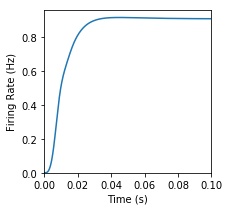

In [9]:
# Visualize:
i1 = simulation.population_list[1]
plt.figure(figsize=(3,3))
plt.plot(i1.t_record, i1.firing_rate_record)
plt.xlim([0,tf])
plt.ylim(ymin=0)
plt.xlabel('Time (s)')
plt.ylabel('Firing Rate (Hz)')

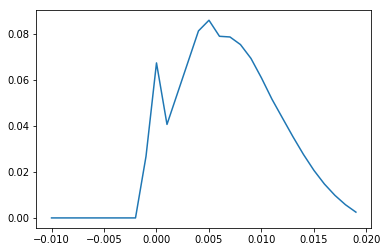

In [10]:
import numpy as np 
from dipde.internals.internalpopulation import InternalPopulation
from dipde.internals.externalpopulation import ExternalPopulation
from dipde.internals.simulation import Simulation
from dipde.internals.connection import Connection as Connection

def test_singlepop():
    
    # Settings:
    t0 = 0.
    dt = .001
    dv = .001
    v_min = -.01
    v_max = .02
    tf = .2
    verbose = False
    
    # Create simulation:
    b1 = ExternalPopulation(50)
    b2 = ExternalPopulation(50)
    i1 = InternalPopulation(v_min=v_min, v_max=v_max, dv=dv, update_method='exact')
    b1_i1 = Connection(b1, i1, 1, weights=[.005], probs=[1.])
    b2_i1 = Connection(b2, i1, 1, weights=[.005], probs=[1.])
    simulation = Simulation([b1, b2, i1], [b1_i1, b2_i1], verbose=verbose)
    simulation.run(dt=dt, tf=tf, t0=t0)
    
    np.testing.assert_almost_equal(i1.t_record[-1], .2, 15)
    np.testing.assert_almost_equal(i1.firing_rate_record[-1], 5.3550005434746355, 12)
    assert i1.n_bins == (v_max - v_min)/dv
    assert i1.n_edges - 1 == i1.n_bins
    assert len(simulation.population_list) == 3
    
    i1.plot_probability_distribution()
    
if __name__ == "__main__":      # pragma: no cover 
    test_singlepop()            # pragma: no cover

    